# Strategy Notebook

In [13]:
# Import pandas_datareader
import pandas_datareader as pdr

# Get the data for Nasdaq Composite
data = pdr.get_data_yahoo('^IXIC', '2010-1-1', '2020-3-10')

# Print last 2 rows of the data
data.tail(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-09,8243.309570,7943.160156,7957.930176,7950.680176,4530350000,7950.680176
2020-03-10,8347.400391,7930.430176,8219.759766,8344.250000,4431930000,8344.250000


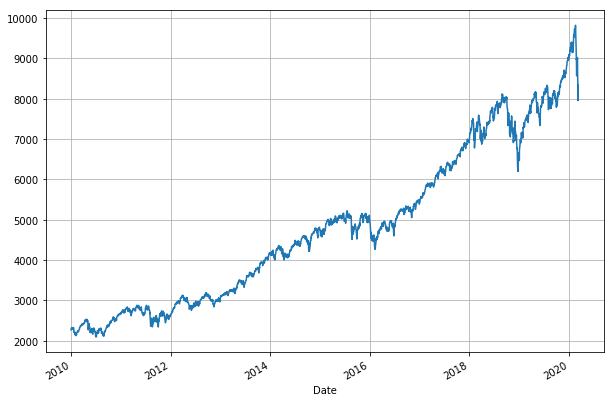

In [2]:
# Plot the Close Price

# Import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Call the plot method
data['Adj Close'].plot(figsize=(10, 7), grid=True)
plt.show()

$$ Overnight\ Returns = \frac{Open - Previous\ Close}{Previous\ Close} $$

$$ Intraday\ Returns = \frac{Close - Open}{Open} $$

In [14]:
# Compute the percentage change

# Previous day close to today's open
data['overnight_returns'] = (
    data['Open']-data['Close'].shift(1))/data['Close'].shift(1)

# Open to Close
data['intraday_returns'] = (data['Close']-data['Open'])/data['Open']

data.head(3)

,High,Low,Open,Close,Volume,Adj Close,overnight_returns,intraday_returns
Date,,,,,,,,
2009-12-31,2293.590088,2269.110107,2292.919922,2269.149902,1237820000,2269.149902,NaN,-0.010367
2010-01-04,2311.149902,2294.409912,2294.409912,2308.419922,1931380000,2308.419922,0.011132,0.006106
2010-01-05,2313.729980,2295.620117,2307.270020,2308.709961,2367860000,2308.709961,-0.000498,0.000624


In [15]:
# Define your conditions on which you want to trade
cond_1 = data.overnight_returns < -0.01
cond_2 = data.overnight_returns > -0.02

# Store it in the signal columns of dataframe data
data['signal'] = np.where(cond_1 & cond_2, 1, 0)

data.head()

,High,Low,Open,Close,Volume,Adj Close,overnight_returns,intraday_returns,signal
Date,,,,,,,,,
2009-12-31,2293.590088,2269.110107,2292.919922,2269.149902,1237820000,2269.149902,NaN,-0.010367,0
2010-01-04,2311.149902,2294.409912,2294.409912,2308.419922,1931380000,2308.419922,0.011132,0.006106,0
2010-01-05,2313.729980,2295.620117,2307.270020,2308.709961,2367860000,2308.709961,-0.000498,0.000624,0
2010-01-06,2314.070068,2295.679932,2307.709961,2301.090088,2253340000,2301.090088,-0.000433,-0.002869,0
2010-01-07,2301.300049,2285.219971,2298.090088,2300.050049,2270050000,2300.050049,-0.001304,0.000853,0


In [18]:
data.loc[data.signal==1].head()

,High,Low,Open,Close,Volume,Adj Close,overnight_returns,intraday_returns,signal
Date,,,,,,,,,
2010-02-25,2236.209961,2198.729980,2208.620117,2234.219971,2300530000,2234.219971,-0.012201,0.011591,1
2010-05-04,2465.550049,2411.280029,2465.550049,2424.250000,3052590000,2424.250000,-0.013283,-0.016751,1
2010-05-05,2421.050049,2382.070068,2395.209961,2402.290039,3041480000,2402.290039,-0.011979,0.002956,1
2010-05-11,2405.260010,2345.500000,2347.699951,2375.310059,2548840000,2375.310059,-0.011357,0.011760,1
2010-05-21,2243.000000,2165.790039,2169.580078,2229.040039,3389670000,2229.040039,-0.015621,0.027406,1


In [10]:
# Compute the strategy returns
strategy_returns = data.signal * data.intraday_returns

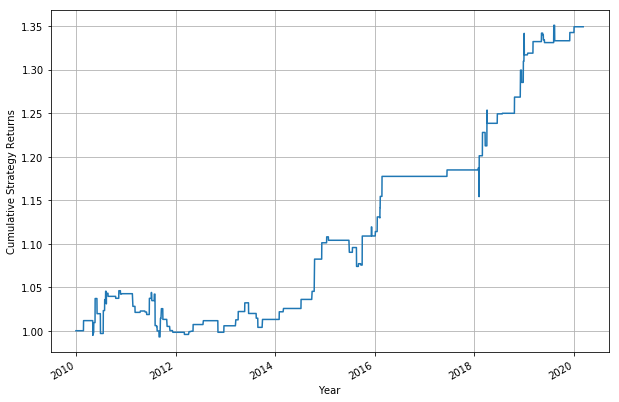

In [11]:
# Plot the cumulative strategy returns
(strategy_returns+1).cumprod().plot(figsize=(10, 7), grid=True)
plt.xlabel('Year')
plt.ylabel('Cumulative Strategy Returns')
plt.show()

C:\Users\ishan.s\AppData\Local\Continuum\miniconda3\envs\py36\envs\py368\lib\site-packages\pyfolio\pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'
C:\Users\ishan.s\AppData\Local\Continuum\miniconda3\envs\py36\envs\py368\lib\site-packages\empyrical\stats.py:1526: RuntimeWarning: invalid value encountered in double_scalars
  np.abs(np.percentile(returns, 5))


Start date,2009-12-31
End date,2020-03-10
Total months,122
,Backtest
Annual return,3.0%
Cumulative returns,34.9%
Annual volatility,4.3%
Sharpe ratio,0.71
Calmar ratio,0.59
Stability,0.86
Max drawdown,-5.1%


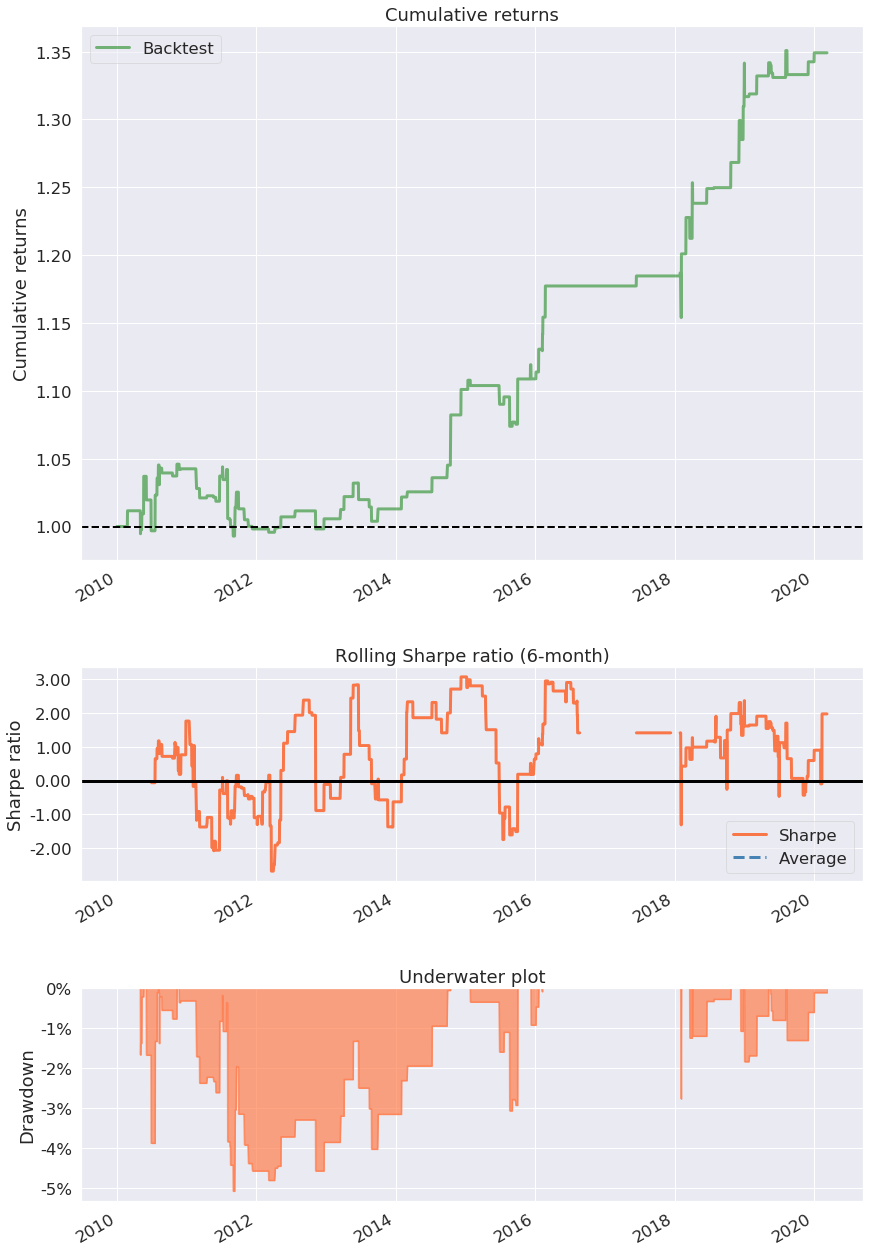

In [12]:
# Detailed performance analysis
import pyfolio as pf
pf.create_simple_tear_sheet(strategy_returns)